In [26]:
import pandas as pd
import numpy as np

In [27]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
df.shape

(768, 9)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
x=df["Glucose"]
y=df['Outcome']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [32]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  537
Model:                            GLM   Df Residuals:                      535
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -279.47
Date:                Mon, 02 Jan 2023   Deviance:                       558.94
Time:                        19:13:13   Pearson chi2:                 1.01e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2226
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5744      0.520    -10.719      0.000      -6.594      -4.555
Glucose        0.0397      0.004      9.856      0.000       0.032       0.048
==============================================================================
"""

In [33]:
y_train_pred = res.predict(X_train_sm)   

In [34]:
data = {'Glucose':X_train, 'Outcome':y_train, 'y_train_pred':y_train_pred}
dib_train = pd.DataFrame(data)

In [35]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
dib_train.head()


,Glucose,Outcome,y_train_pred,Diabetes_predicted
155,152,1,0.612023,1
150,136,0,0.455384,0
78,131,1,0.406777,0
9,125,1,0.350842,0
142,108,0,0.215890,0


In [36]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(dib_train.Outcome, dib_train.Diabetes_predicted)
print(confusion)

# Let's check the overall accuracy.
print(metrics.accuracy_score(dib_train.Outcome, dib_train.Diabetes_predicted))

[[309  41]
 [ 96  91]]
0.74487895716946


In [37]:
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    dib_train[i]= dib_train.y_train_pred.map(lambda x: 1 if x > i else 0)
dib_train.head()

,Glucose,Outcome,y_train_pred,Diabetes_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
155,152,1,0.612023,1,1,1,1,1,1,1,1,0,0,0
150,136,0,0.455384,0,1,1,1,1,1,0,0,0,0,0
78,131,1,0.406777,0,1,1,1,1,1,0,0,0,0,0
9,125,1,0.350842,0,1,1,1,1,0,0,0,0,0,0
142,108,0,0.215890,0,1,1,1,0,0,0,0,0,0,0


In [47]:
 from sklearn.metrics import confusion_matrix
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(dib_train.Outcome, dib_train[i])
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specificity]

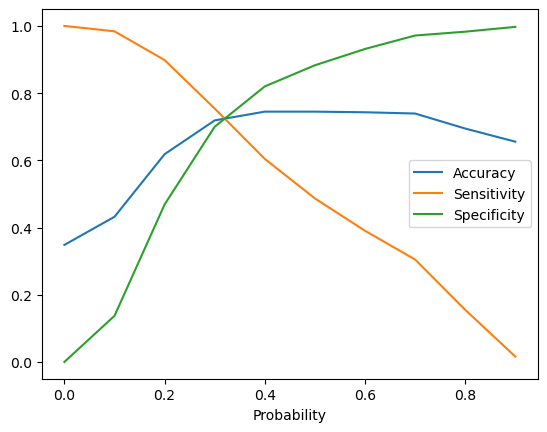

In [48]:
import matplotlib.pyplot as plt
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificity'])
plt.show()

In [41]:
dib_train['Diabetes_predicted'] = dib_train.y_train_pred.map(lambda x: 1 if x > 0.32 else 0)
# Let's check the overall accuracy.
print(metrics.accuracy_score(dib_train.Outcome, dib_train.Diabetes_predicted))

0.7281191806331471


In [44]:
# Confusion matrix
confusion = metrics.confusion_matrix(dib_train.Outcome, dib_train.Diabetes_predicted)
print(confusion)

[[253  97]
 [ 49 138]]
